# Tests on EventDisplay data

**Purpose of this notebook:**

- Read DL2 files from _EventDisplay_ in FITS format.

- Read _pyirf_ output using those files.

- Compare this output to the IRFs provided by _EventDisplay_.

**Notes:**

Only the _on-axis 50 h_ case is taken into account for the moment.

**Resources:**

_EventDisplay_ data, https://forge.in2p3.fr/projects/cta_analysis-and-simulations/wiki/Eventdisplay_Prod3b_DL2_Lists

**TO-DOs:**

- ..

## Imports libraries and modules...

### ...from third-party libraries

In [27]:
import numpy as np
import uproot
from astropy.io import fits
import matplotlib.pyplot as plt

## Functions

These should be added to _pyirf_ if judged useful!

## Read DL2 files from _EventDisplay_ in FITS format

This is only for understanding their format in order to add it to pyirf and produce the IRFs to compare

In [6]:
# Path of the required data in the user's local setup
# Please, empty these variables before pushing to the repo!
dl2_path = "/Users/michele/Applications/ctasoft/tests/pyirf/EventDisplay/DL2"
irf_path = "/Users/michele/Applications/ctasoft/tests/pyirf/EventDisplay/IRFs/data/WPPhys201890925LongObs"

In [8]:
# DL2 files 
gammas = fits.open(f'{dl2_path}/gamma_onSource.S.3HB9-FD_ID0.eff-0-CUT0.fits')
electrons = fits.open(f'{dl2_path}/electron_onSource.S.3HB9-FD_ID0.eff-0-CUT0.fits')
protons = fits.open(f'{dl2_path}/proton_onSource.S.3HB9-FD_ID0.eff-0-CUT0.fits')

# IRFs files
irf = uproot.open(f'{irf_path}/DESY.d20180113.V3.ID0_180degNIM2LST4MST4SST4SCMST4.prod3b-paranal20degs05b-NN.S.3HB9-FD.180000s.root')

In [9]:
# DL2 of e.g. gammas contents
gamma.info()

Filename: /Users/michele/Applications/ctasoft/tests/pyirf/EventDisplay/DL2/electron_onSource.S.3HB9-FD_ID0.eff-0-CUT0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  EVENTS        1 BinTableHDU     44   372833R x 9C   [1K, 1K, 1E, 1E, 1E, 1E, 1E, 1E, 1J]   
  2  SIMULATED EVENTS    1 BinTableHDU     21   1R x 3C   [60E, 60E, 60E]   


In [11]:
# IRF contents
irf.keys()

[b'IntSens;1',
 b'IntSensCU;1',
 b'DiffSens;1',
 b'DiffSensCU;1',
 b'BGRate;1',
 b'ProtRate;1',
 b'ElecRate;1',
 b'BGRatePerSqDeg;1',
 b'ProtRateSqDeg;1',
 b'ElecRateSqDeg;1',
 b'EffectiveArea;1',
 b'EffectiveAreaEtrue;1',
 b'EffectiveAreaEtrueNoTheta2cut;1',
 b'EffectiveAreaNoTheta2cut;1',
 b'EffectiveArea80;1',
 b'AngRes;1',
 b'AngRes80;1',
 b'AngRes95;1',
 b'AngResEtrue;1',
 b'AngResEtrue80;1',
 b'AngResEtrue95;1',
 b'ERes;1',
 b'Ebias;1',
 b'Theta2Cut;1',
 b'ThetaCut;1',
 b'MigMatrix;1',
 b'MigMatrixNoTheta2cut;1',
 b'EestOverEtrue;1',
 b'EestOverEtrueNoTheta2cut;1',
 b'AngularPSF2D;1',
 b'AngularPSF2DEtrue;1',
 b'IntSens_offaxis;1',
 b'IntSensCU_offaxis;1',
 b'DiffSens_offaxis;1',
 b'DiffSensCU_offaxis;1',
 b'BGRate_offaxis;1',
 b'ProtRate_offaxis;1',
 b'ElecRate_offaxis;1',
 b'BGRatePerSqDeg_offaxis;1',
 b'ProtRateSqDeg_offaxis;1',
 b'ElecRateSqDeg_offaxis;1',
 b'EffectiveArea_offaxis;1',
 b'EffectiveAreaEtrue_offaxis;1',
 b'EffectiveAreaEtrueNoTheta2cut_offaxis;1',
 b'EffectiveA

### Plot EventDisplay's IRFs

#### Differential sensitivity

In [22]:
h = irf["DiffSens"]

In [66]:
h.bins

array([[-1.9, -1.7],
       [-1.7, -1.5],
       [-1.5, -1.3],
       [-1.3, -1.1],
       [-1.1, -0.9],
       [-0.9, -0.7],
       [-0.7, -0.5],
       [-0.5, -0.3],
       [-0.3, -0.1],
       [-0.1,  0.1],
       [ 0.1,  0.3],
       [ 0.3,  0.5],
       [ 0.5,  0.7],
       [ 0.7,  0.9],
       [ 0.9,  1.1],
       [ 1.1,  1.3],
       [ 1.3,  1.5],
       [ 1.5,  1.7],
       [ 1.7,  1.9],
       [ 1.9,  2.1],
       [ 2.1,  2.3]])

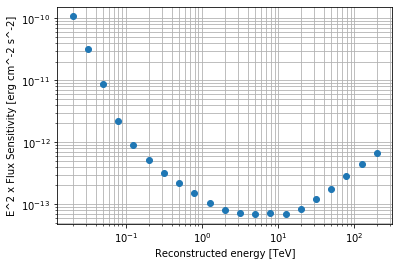

In [59]:
plt.loglog(10**h.numpy()[1][1:], h.numpy()[0], "o")
plt.xlabel("Reconstructed energy [TeV]")
plt.ylabel("E^2 x Flux Sensitivity [erg cm^-2 s^-2]")
plt.grid(which="both")
plt.show()

## Read _pyirf_ output

## Compare _pyirf_ IRFs with those provided by _EventDisplay_